# Bonus Question
Below are plots of selected cell surface biomarkers of blood cell samples. Researchers are interested in picking out cells marked in yellow (accupying a high-density chunk at the bottom-right) for further analysis. How would you suggest a method to automatically identify these cells?

Image format: PNG
Image size: (561, 408)
Image mode: RGBA


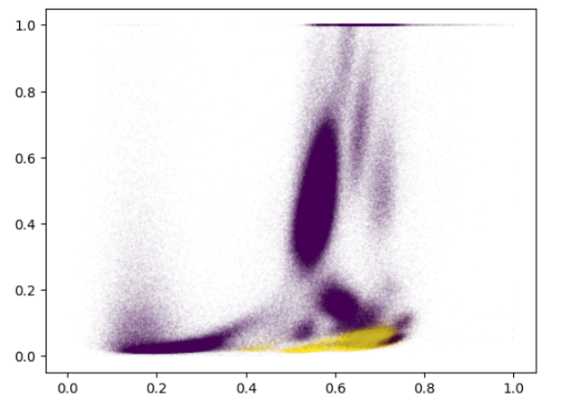

In [30]:
from PIL import Image

# open the image file
image = Image.open('./data/bonus_img.png')

# get information about the image
print("Image format:", image.format)
print("Image size:", image.size)
print("Image mode:", image.mode)

from IPython.display import Image
Image(filename='./data/bonus_img.png')

In [31]:
# define the color to search for (in RGB format)
target_color = (255, 255, 0) # Yellow(255, 255, 0)

# define the color range for matching pixels
color_range = 100 # adjust this value to make the color range wider or narrower
width, height = image.size

# create an empty list to store the coordinates of the red pixels
matching_pixels  = []

# loop over all pixels in the image
for y in range(height):
    for x in range(width):
        
        # get the RGB values of the pixel at (x, y)
        pixel = image.getpixel((x, y))
        
        # check if the pixel is within the color range of the target color
        if abs(pixel[0] - target_color[0]) <= color_range and \
           abs(pixel[1] - target_color[1]) <= color_range and \
           abs(pixel[2] - target_color[2]) <= color_range:
            
            # if the pixel is a match, add its coordinates to the list
            matching_pixels.append((x, y))
            
points = matching_pixels

# get the lowest and highest x values
x_values = [point[0] for point in points]
min_x = min(x_values)
max_x = max(x_values)

y_values = [point[1] for point in points]
min_y = min(y_values)
max_y = max(y_values)

# create a drawing object
from PIL import Image, ImageDraw

draw = ImageDraw.Draw(image)

# define the coordinates of the bounding box & draw the bounding box
draw.rectangle((min_x, min_y, max_x, max_x), outline='red', width=2)

# create a drawing object
draw = ImageDraw.Draw(image)
points = matching_pixels

# loop over the points and draw a dot at each coordinate
for point in points:
    draw.ellipse([point[0]-5, point[1]-5, point[0]+5, point[1]+5], fill='red')

# save the image with the bounding box
image.save('Detected_area.png')

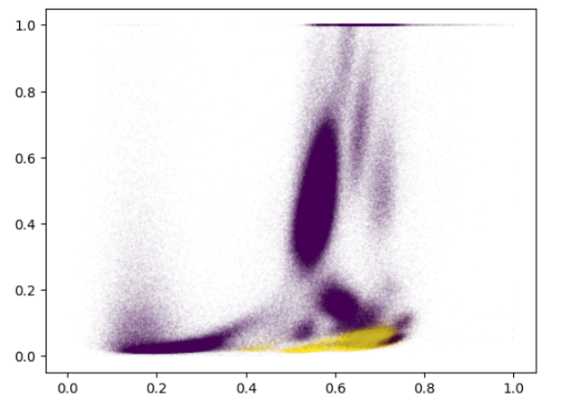

In [32]:
from IPython.display import Image

Image(filename='./data/bonus_img.png')

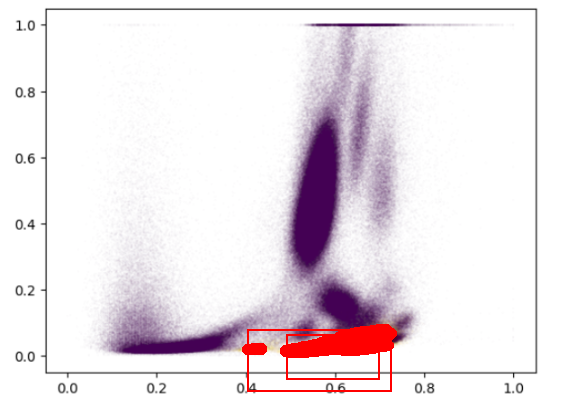

In [33]:
Image(filename='./data/Detected_area.png')
